Face Recognition Model Using Convolutional Neural Network (CNN) By Keerthivaasan VG (24ucs047)

In [5]:
#Importing the header files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Defining the image and batch size
IMG_SIZE= 224
BATCH_SIZE= 32

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [8]:
#Training Generator
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Classifier',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

Found 1040 images belonging to 3 classes.


In [9]:
#Validation
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Classifier',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 260 images belonging to 3 classes.


In [10]:
#Get the class indices from the training generator
class_indices = train_generator.class_indices
#extract class names
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'Keerthivaasan ': 0, 'Manohar': 1, 'Miduna Varshini': 2}
Class names: ['Keerthivaasan ', 'Manohar', 'Miduna Varshini']


In [11]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_generator,epochs=50,validation_data=val_generator,batch_size= 16)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 353s 11s/step - accuracy: 0.4423 - loss: 1.6920 - val_accuracy: 0.8423 - val_loss: 0.4308
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.9231 - loss: 0.2419 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9962 - val_loss: 0.0189
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.9967 - loss: 0.0144 - val_accuracy: 0.9962 - val_loss: 0.0125
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.2051e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 1.0000 - loss: 1.0498e-04 - val_accuracy: 1.0000 - val_loss: 5.3206e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 1.0000 - loss: 5.5607e-05 - 

In [15]:
model.save('/content/drive/MyDrive/facerecognition1.h5')

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/facerecognition1.h5')
print("Model loaded")

Model loaded


In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_path = take_photo()
print("Saved to", photo_path)


<IPython.core.display.Javascript object>

Saved to photo.jpg


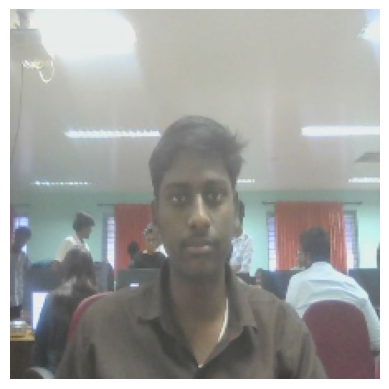

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Predicted class: Keerthivaasan 


In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img(photo_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
ind = np.argmax(prediction)
print("Predicted class:", class_names[ind])
